In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
avgs = np.load("avgs.npy")
maxs = np.load("maxs.npy")
mins = np.load("mins.npy")
ts = np.load("ts.npy")

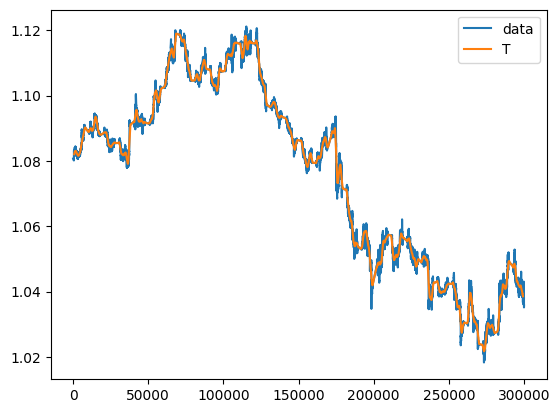

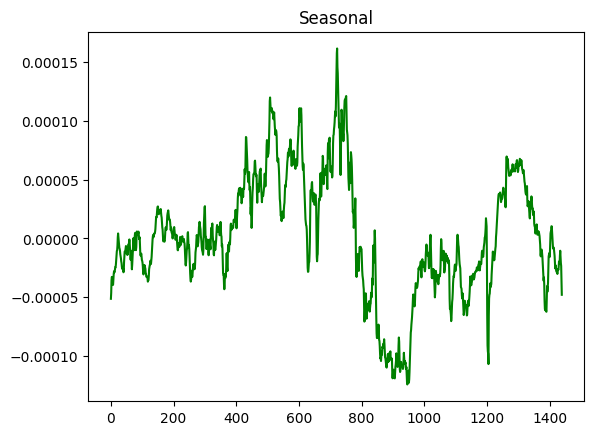

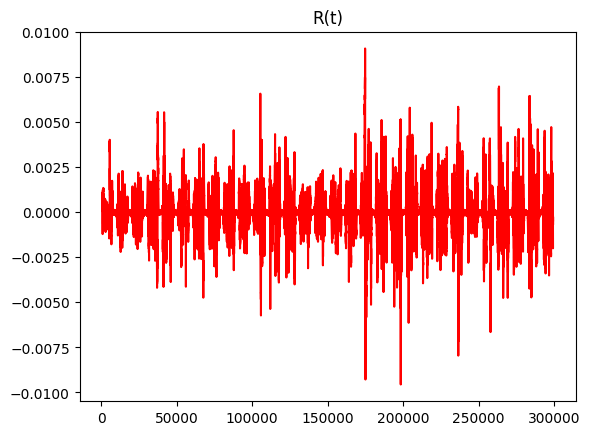

In [ ]:
period = 60*24 # Period of an hour
def get_T(data, period, idx):
    N = len(data)
    if period % 2 == 0:
        n = period//2 - 1
        # Even period: effort
        if idx <= n or idx + n + 1 >= N:
            return 0
        return (np.sum(data[idx-n: idx+n+1]) + data[idx-n-1]/2 + data[idx+n+1]/2)/period
    else:
        # Odd period
        n = period // 2
        if idx < n:
            return 0*np.sum(data[0:period])/period
        return np.sum(data[idx-n: idx+n+1])/period
def get_S(detrended, period, idx):
    idx = idx%period
    N = len(detrended)
    tot = 0
    i = 0
    while idx < N:
        tot += detrended[idx]
        idx += period
        i += 1
    return tot/i

L = 300000
data = avgs[-L:]
curr_ts = ts[:L]
N = len(data)
T = [get_T(data, period, i) for i in range(len(data))]
detrended = (data - T)[period//2:-period//2]
S = [get_S(detrended, period, i) for i in range(len(detrended))]
plt.plot(curr_ts,data, label="data")

plt.plot(curr_ts[period//2:-period//2],T[period//2:-period//2], label="T")
plt.legend()
plt.show()
plt.title("Seasonal")
plt.plot(curr_ts[:period], S[:period],'g')
plt.show()
R = detrended - S
plt.plot(curr_ts[period//2:-period//2], R, 'r')
plt.title("R(t)")
plt.show()

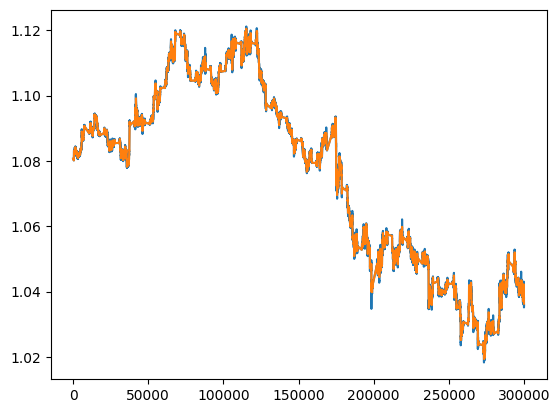

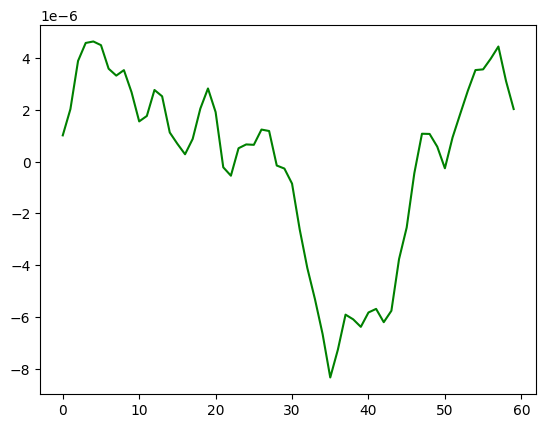

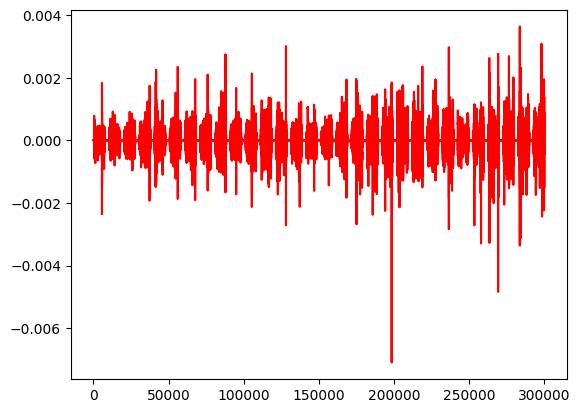

In [ ]:
period = 60*24 # Period of a day



L = 300000
data = avgs[-L:]
curr_ts = ts[:L]

MemoryError: Unable to allocate 197. MiB for an array with shape (12934044, 2) and data type float64

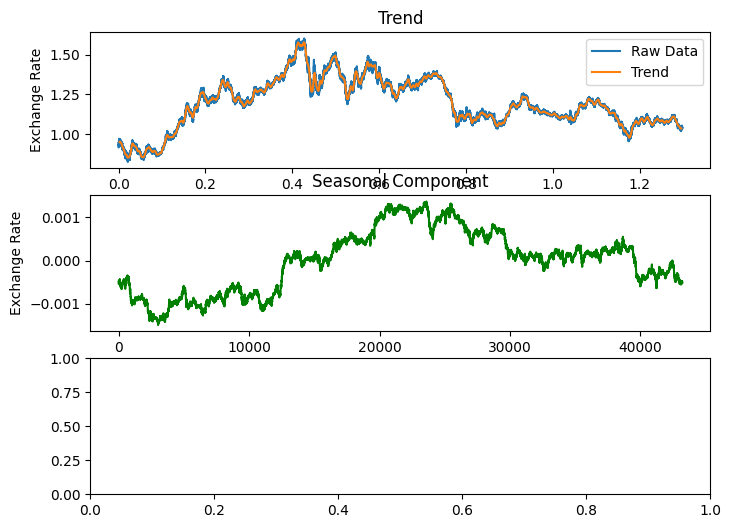

In [ ]:
period = 60*24*30 # Period of a month
# Get seasonal component
def get_S(detrended, period, idx):
    if idx >= period:
        return None
    N = len(detrended)
    tot = 0
    i = 0
    while idx < N:
        tot += detrended[idx]
        idx += period
        i += 1
    return tot/i
# Get Trend using moving averages
def get_all_T(data, period):
    # assumes period is divisible by 2
    N = len(data)
    window = data[:period]
    curr_sum = np.sum(window)
    final = np.zeros(N-period)
    i = 0
    while i + period < N:
        curr_sum += data[period+i]
        first = data[i]
        last = data[period+i]
        final[i] = curr_sum - last/2 - first/2
        i += 1
        curr_sum -= first
    return final/period

data = avgs
curr_ts = ts

# Use functions to get T and S parts
N = len(data)
T = get_all_T(data, period)
detrended = (data)[period//2:-period//2] - T
S_dict = [get_S(detrended, period, i) for i in range(period)]
S = [S_dict[i%period] for i in range(len(detrended))]
R = detrended - S

# Plot
plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(curr_ts,data, label="Raw Data")
plt.plot(curr_ts[period//2:-period//2],T, label="Trend")
plt.title("Trend")
plt.xlabel("Minutes Since May 30, 2000, 17:35")
plt.ylabel("Exchange Rate")
plt.legend()
plt.subplot(312)
plt.plot(curr_ts[:period], S[:period],'g')
plt.title("Seasonal Component")
plt.xlabel("Minute of the Month")
plt.ylabel("Exchange Rate")
plt.subplot(313)
plt.plot(curr_ts[period//2:-period//2], R, 'r')
plt.title("Remainder")
plt.xlabel("Minutes Since May 30, 2000, 17:35")
plt.ylabel("Exchange Rate")
plt.tight_layout()
plt.show()

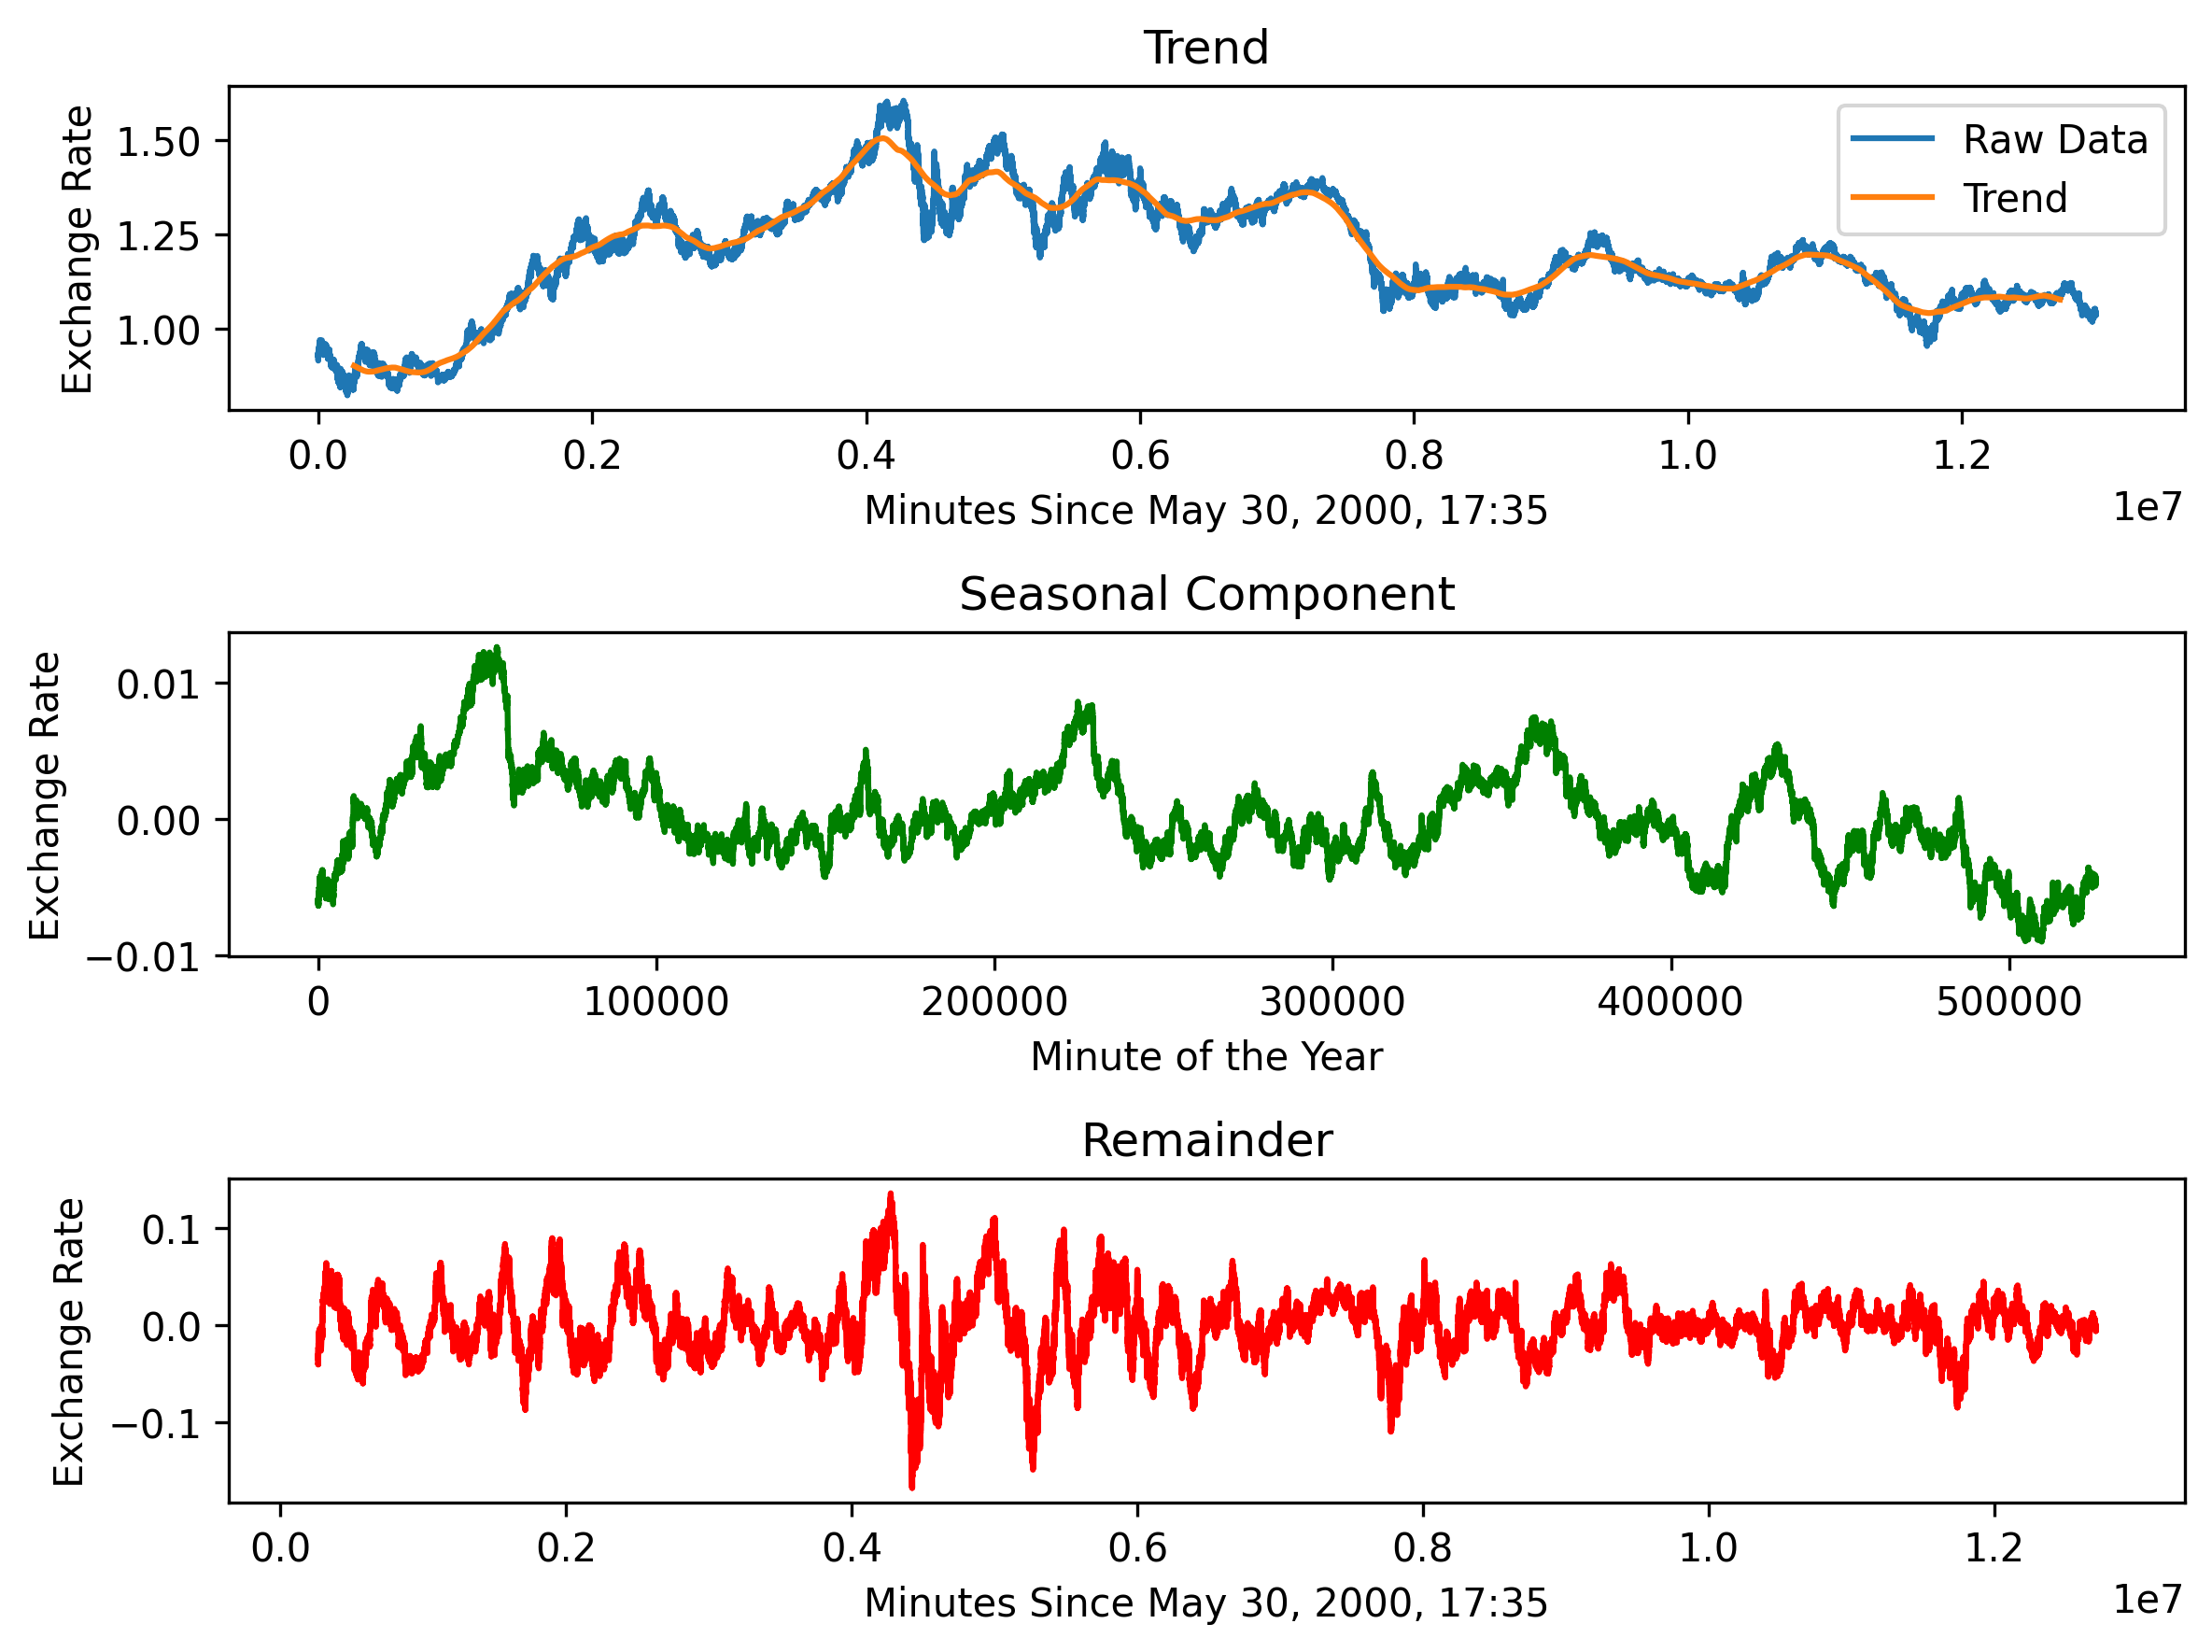

In [3]:
period = 60*24*365 # Period of a year
def get_T(data, period, idx):
    N = len(data)
    if period % 2 == 0:
        n = period//2 - 1
        # Even period: effort
        if idx <= n or idx + n + 1 >= N:
            return 0
        return (np.sum(data[idx-n: idx+n+1]) + data[idx-n-1]/2 + data[idx+n+1]/2)/period
    else:
        # Odd period
        n = period // 2
        if idx < n:
            return 0*np.sum(data[0:period])/period
        return np.sum(data[idx-n: idx+n+1])/period
def get_S(detrended, period, idx):
    if idx >= period:
        return None
    N = len(detrended)
    tot = 0
    i = 0
    while idx < N:
        tot += detrended[idx]
        idx += period
        i += 1
    return tot/i
def get_all_T(data, period):
    # assumes period is divisible by 2
    N = len(data)
    window = data[:period]
    curr_sum = np.sum(window)
    final = np.zeros(N-period)
    i = 0
    while i + period < N:
        curr_sum += data[period+i]
        first = data[i]
        last = data[period+i]
        final[i] = curr_sum - last/2 - first/2
        i += 1
        curr_sum -= first
    return final/period

L = 3000000
data = avgs
curr_ts = ts
N = len(data)
T = get_all_T(data, period)
detrended = (data)[period//2:-period//2] - T
S_dict = [get_S(detrended, period, i) for i in range(period)]
S = [S_dict[i%period] for i in range(len(detrended))]
plt.figure(figsize=(8,6), dpi=300)
plt.subplot(311)
plt.plot(curr_ts,data, label="Raw Data")
plt.plot(curr_ts[period//2:-period//2],T, label="Trend")
plt.title("Trend")
plt.xlabel("Minutes Since May 30, 2000, 17:35")
plt.ylabel("Exchange Rate")
plt.legend()
plt.subplot(312)
plt.plot(curr_ts[:period], S[:period],'g')
plt.title("Seasonal Component")
plt.xlabel("Minute of the Year")
plt.ylabel("Exchange Rate")
plt.subplot(313)
R = detrended - S
plt.plot(curr_ts[period//2:-period//2], R, 'r')
plt.title("Remainder")
plt.xlabel("Minutes Since May 30, 2000, 17:35")
plt.ylabel("Exchange Rate")
plt.tight_layout()
plt.show()